In [67]:
import numpy as np
from numpy.polynomial.chebyshev import Chebyshev
from collections import namedtuple
import matplotlib.pyplot as plt
from scipy.signal import blackman

from sympy import symbols

# Loading and pre-processing pulses

Load pulses. Note that each pulse has its own time axis

In [81]:
pulses = {}

observational_window = -0.5, 0.5

# declare type
Pulse = namedtuple('Pulse', ['time', 'field', 'interp_field'])

for freq in range(5, 9):
    data = np.loadtxt(
        'experimental data 01-05-2022/Combinedpulses_f0{}_400uJ_xavg.txt'.format(freq)
    )
    time, field = data.T
    
    # check that time is time
    assert np.all(np.diff(time) > 0), "`time` is probably not time"
    
    label = '0.{} THz'.format(freq)

    
    # extract indices of the observational window
    ow1 = np.searchsorted(time, observational_window[0], side='left')
    ow2 = np.searchsorted(time, observational_window[1], side='right')
    
    print(field.size)
    
    pulses[label] = Pulse(
        time, 
        field, 
        Hermite(0).fit(
            time, field * blackman(field.size), deg=50, #window=observational_window
        )
    )

# saving the largest frequency
largest_freq = label

401
401
401
401


/Users/dbondar/opt/anaconda3/lib/python3.8/site-packages/numpy/polynomial/hermite.py:1391: RankWarning: The fit may be poorly conditioned
  return pu._fit(hermvander, x, y, deg, rcond, full, w)


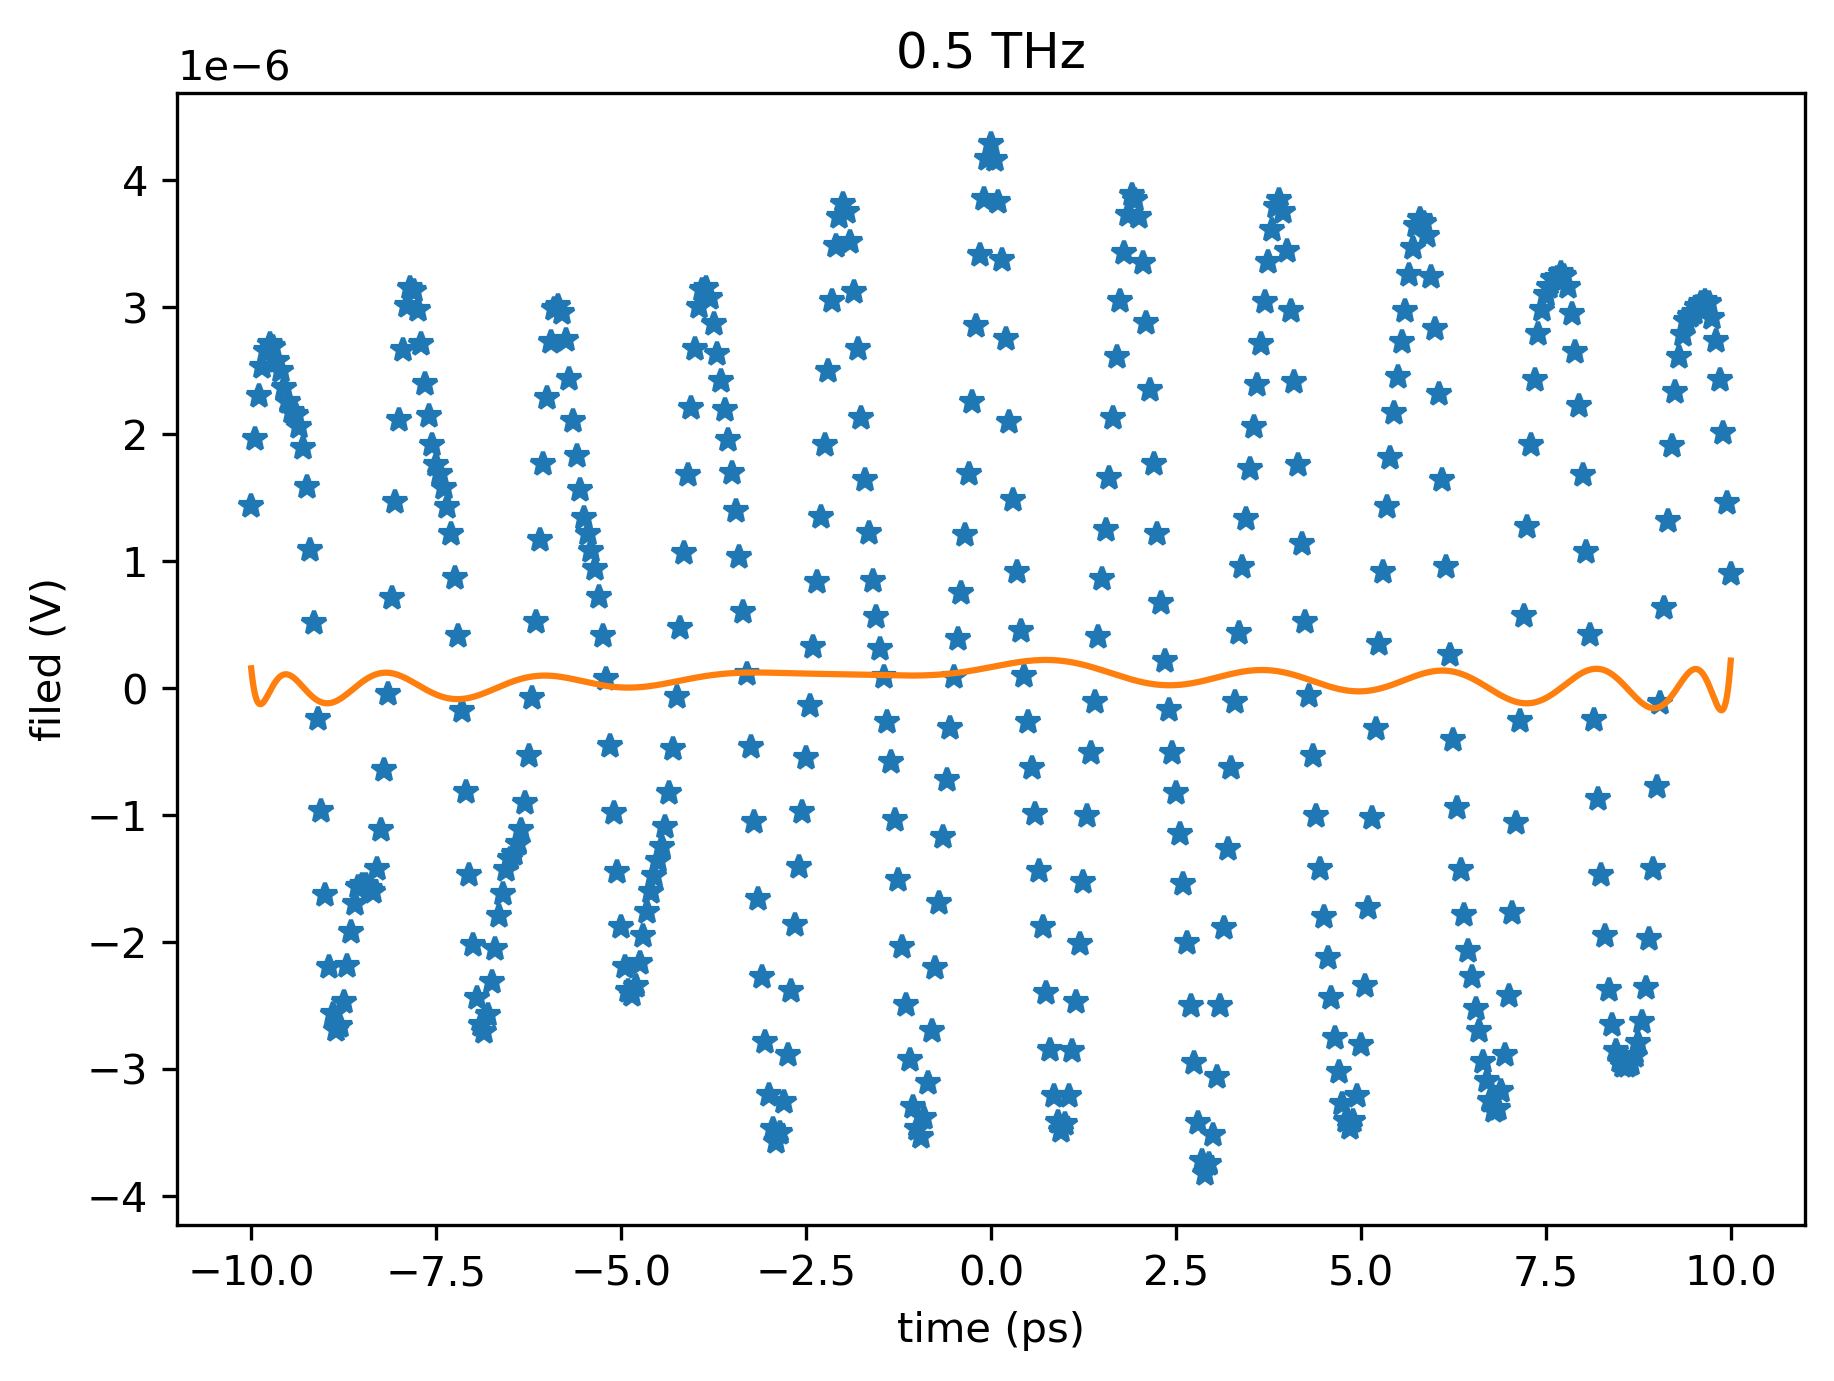

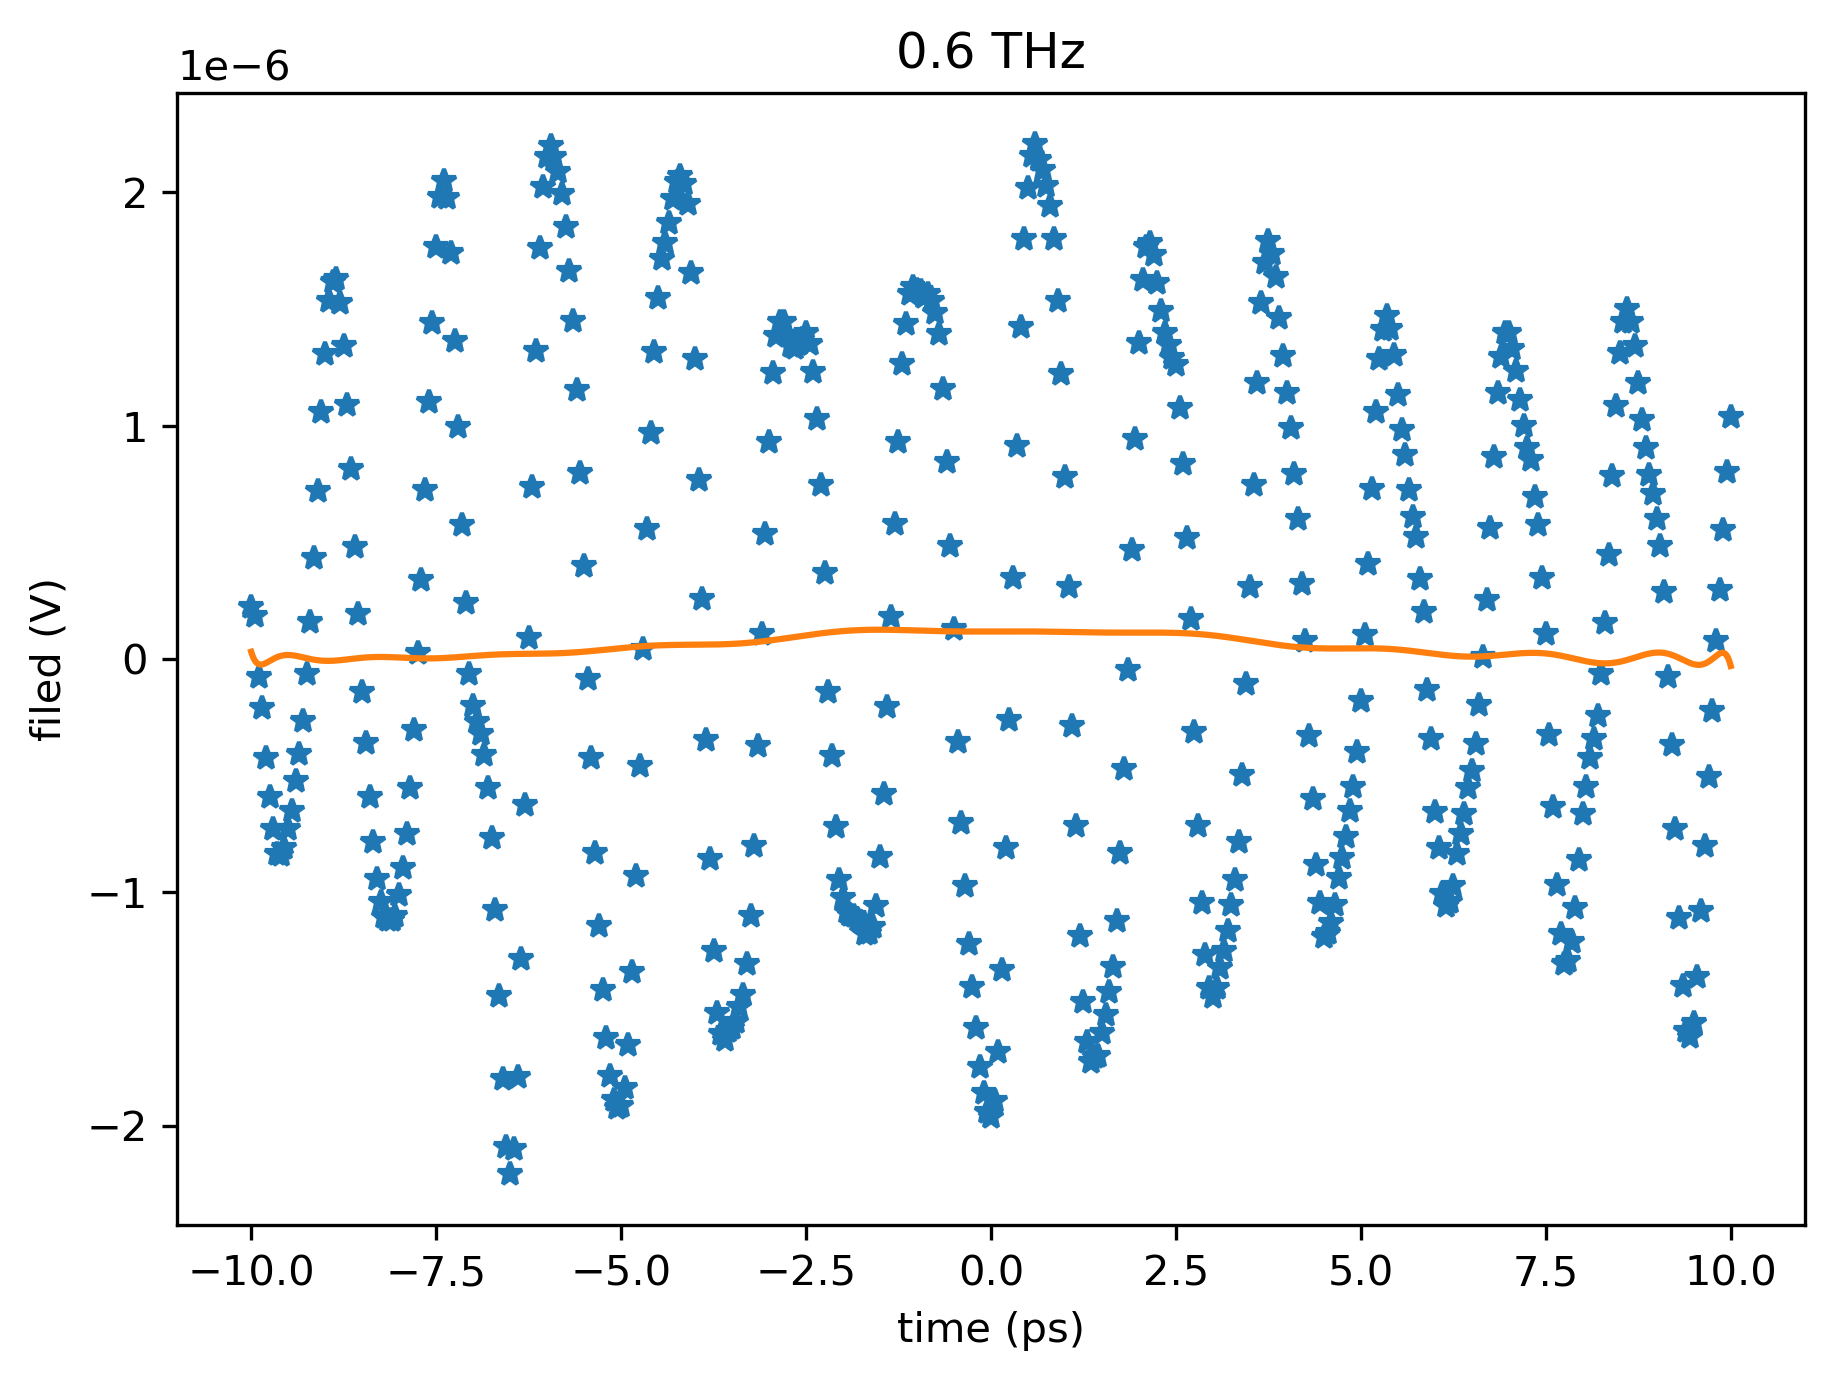

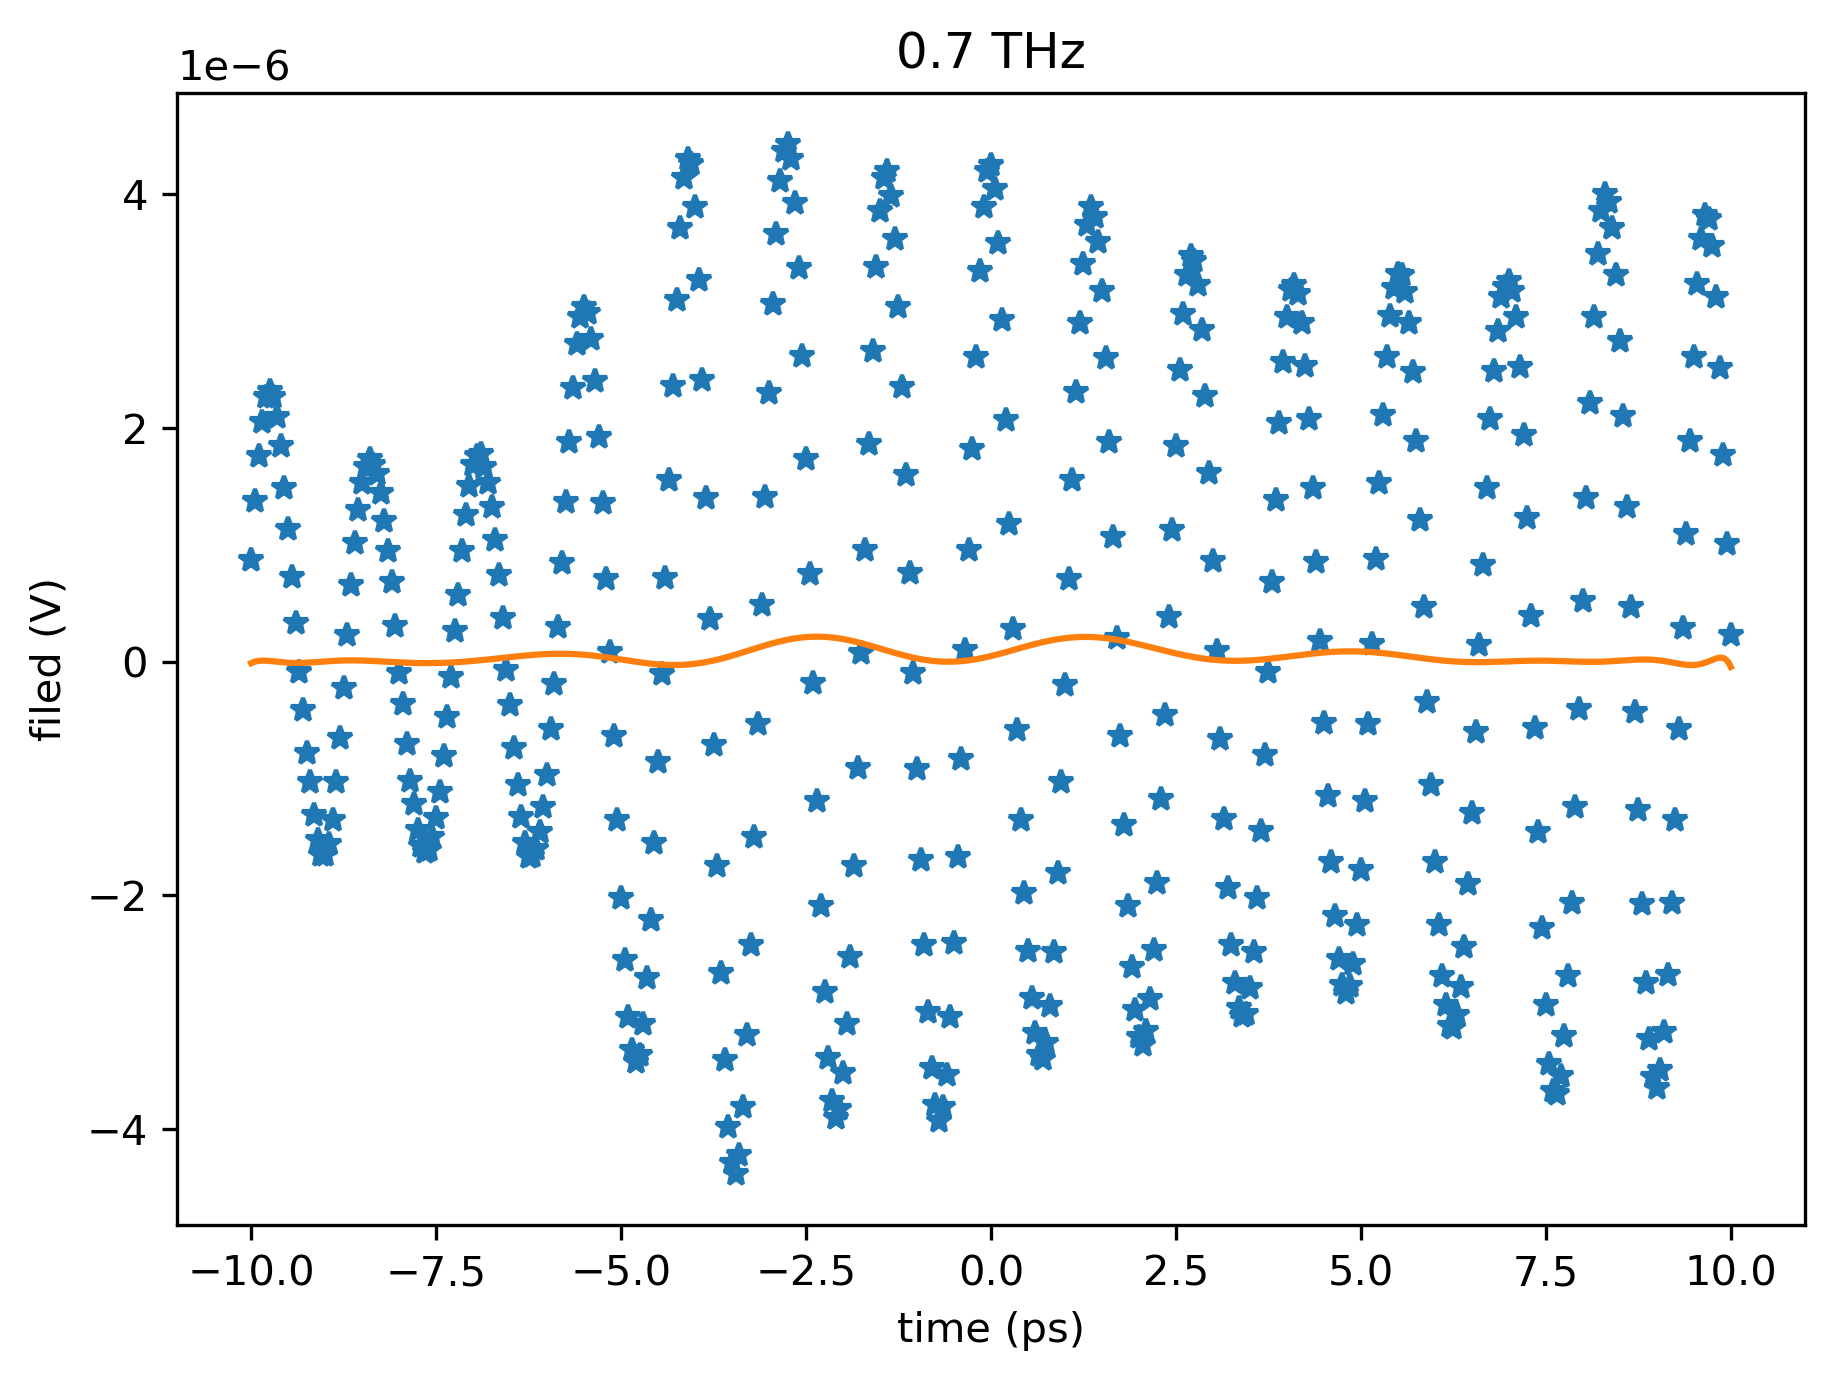

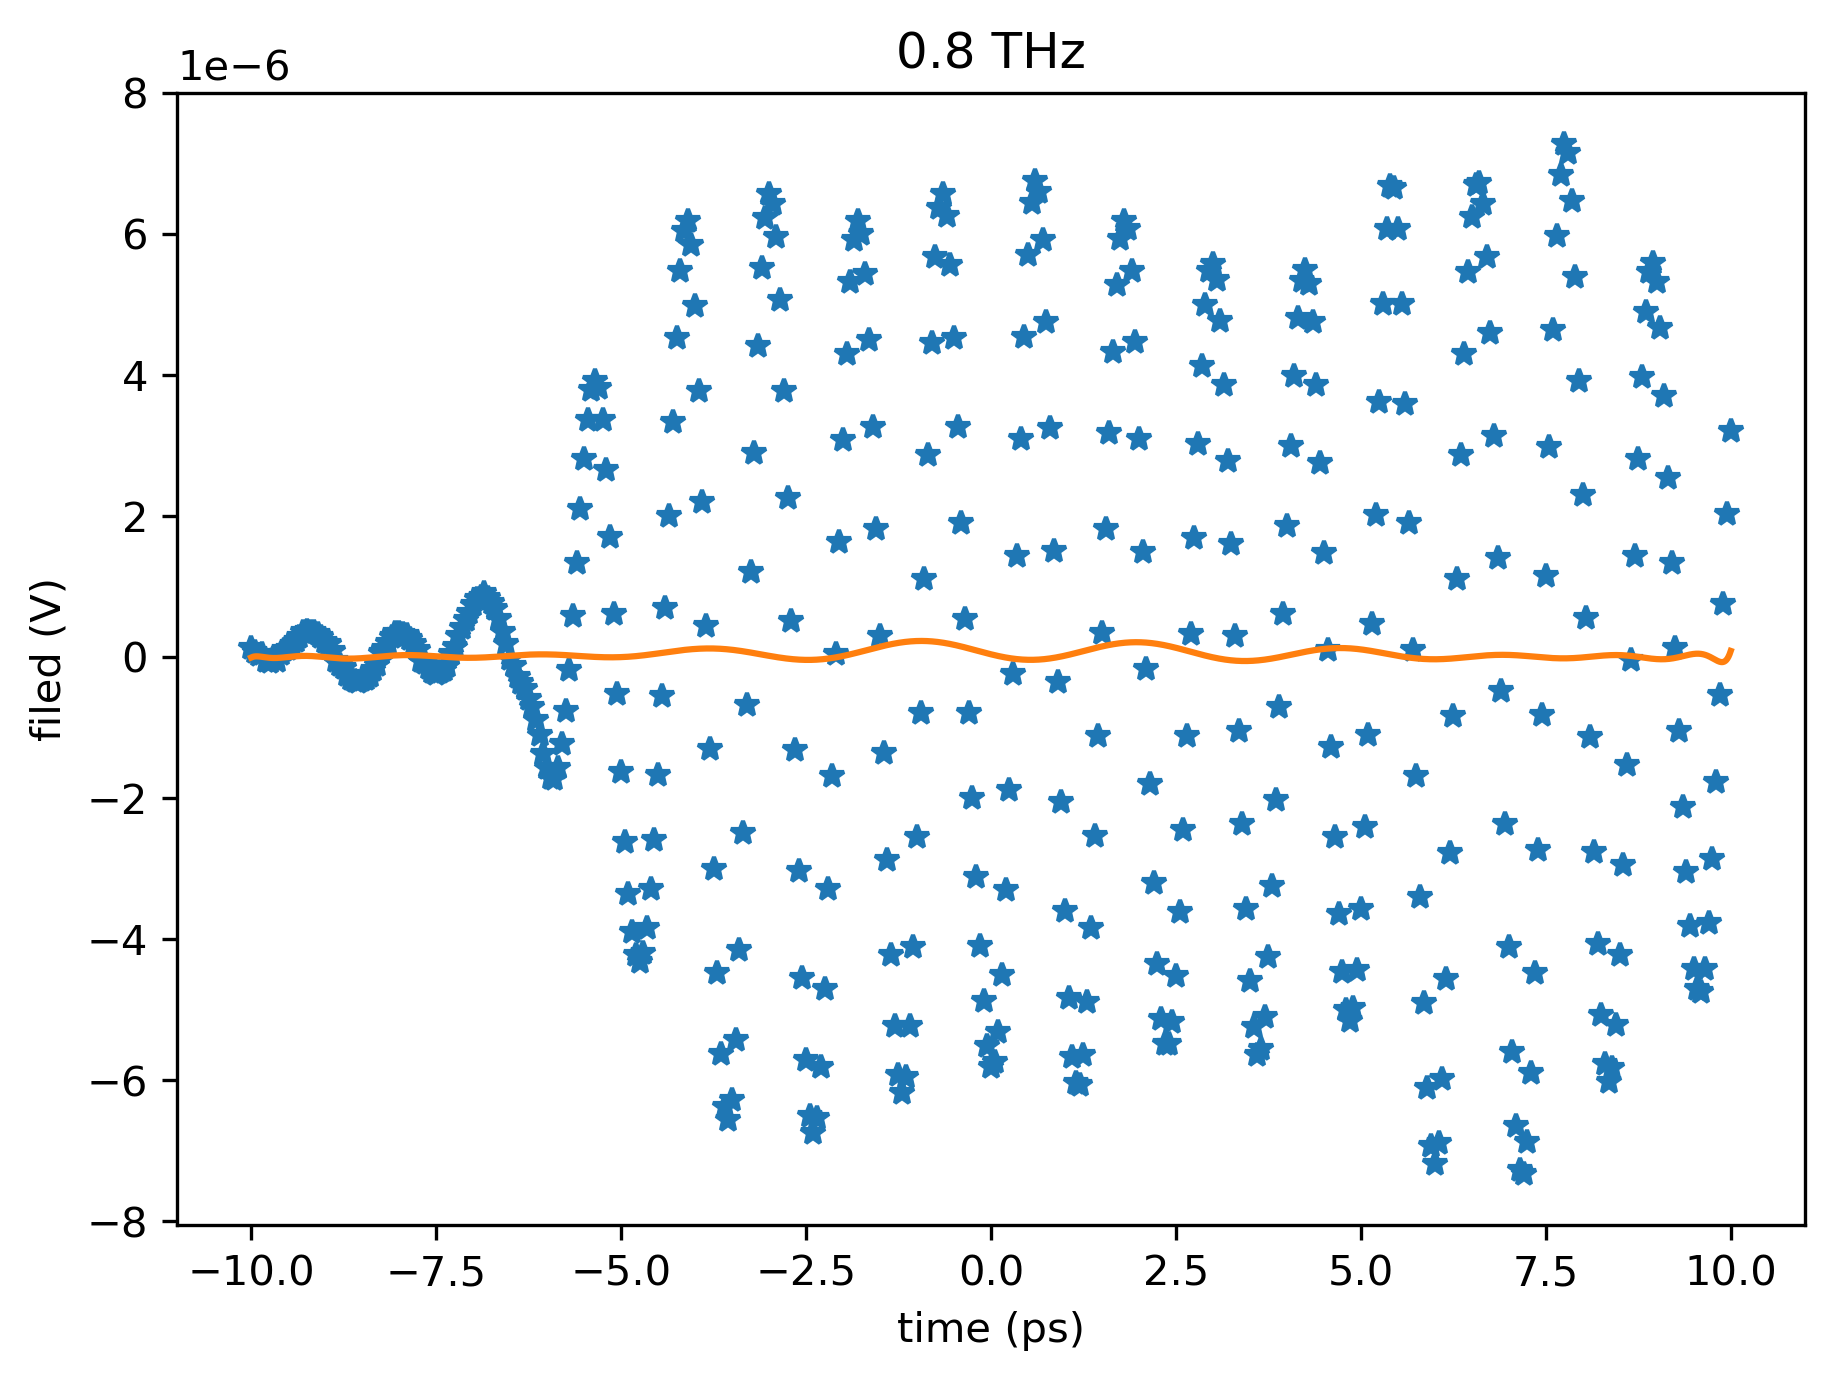

In [82]:
# Plot pulses
for freq, (time, field, interp_field) in pulses.items():
    plt.figure(figsize=(7, 5), dpi=300)
    plt.title(freq)
    plt.plot(time, field, '*')
    
    t = np.linspace(time.min(), time.max(), 10 * time.size)
    
    plt.plot(t, interp_field(t))
    
    plt.xlabel('time (ps)')
    plt.ylabel('filed (V)')
    plt.show()  

### Plot all pulses within the observational window

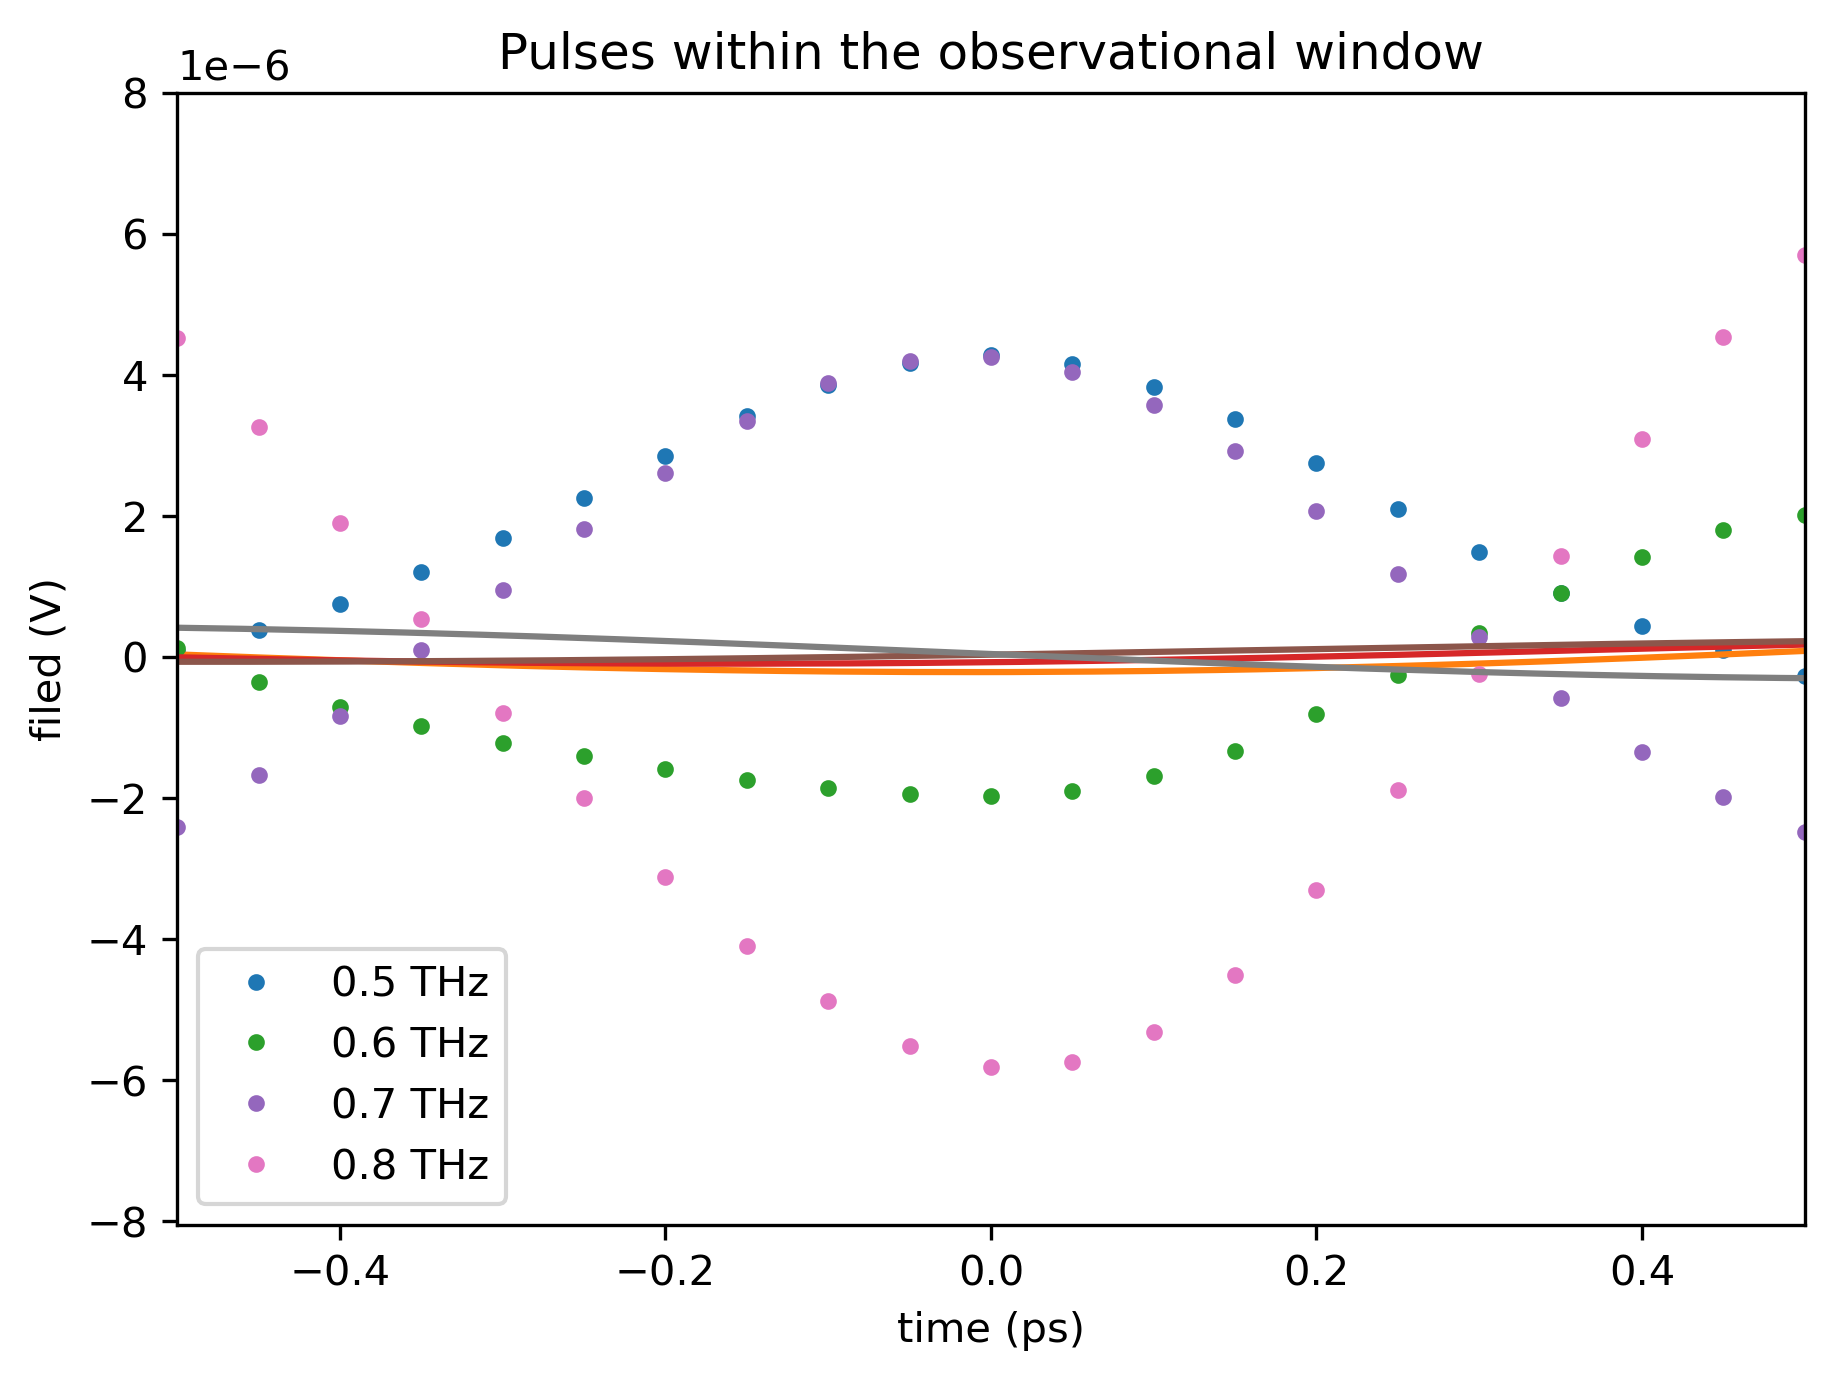

In [60]:
# Plot pulses
plt.figure(figsize=(7, 5), dpi=300)

plt.title("Pulses within the observational window")

for freq, (time, field, interp_field) in pulses.items():
    plt.plot(time, field, '.', label=freq)
    
    t = np.linspace(*observational_window, num=200)
    
    plt.plot(t, interp_field(t))
    
    plt.xlim(observational_window)
    plt.xlabel('time (ps)')
    plt.ylabel('filed (V)')

plt.legend()
plt.show()  

In [17]:
f(symbols('x'))

2.0*x*(4.0*x*(-6.07104510422318e-11*x - 3.07694893709423e-10) + 1.00512264472113e-8) + 6.07104510422318e-11*x + 1.4423315136548e-7